In [2]:
# --- Setup logger ---
import logging
import sys
import os
import json

# --- Data manipulation ---
import numpy as np
import pandas as pd

# --- Data visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.listdir('../simulations/results')

['results.json']

In [4]:
# load the imulation data
import json

# Load dictionary from a JSON file
with open('../simulations/results/results.json', 'r') as file:
    data = json.load(file)

print(data)
print(type(data))  # Should be <class 'dict'>


{'std_1': {'graph_neighbor_2': {'graph_neighbors': 2, 'score_base_estimator_val': 1.0, 'score_base_estimator_unlabel': 0.9994058229352347, 'score_base_estimator_test': 0.9997058823529412, 'setred_score_mean_test': 0.9956617647058826, 'setred_score_std_test': 0.003159917380988192, 'setred_score_mean_unlabel': 0.9961244800950684, 'setred_score_std_unlabel': 0.0027307385805865796, 'score_list_test': [0.9920588235294118, 0.995, 0.9935294117647059, 0.9926470588235294, 0.9979411764705882, 0.9929411764705882, 0.9914705882352941, 0.9958823529411764, 0.9947058823529412, 0.9985294117647059, 0.9988235294117647, 0.9926470588235294, 0.9964705882352941, 0.9979411764705882, 0.9947058823529412, 0.9947058823529412, 0.9979411764705882, 0.9955882352941177, 0.9935294117647059, 0.9941176470588236, 0.9926470588235294, 0.9988235294117647, 0.9982352941176471, 0.9991176470588236, 0.9891176470588235, 0.9952941176470588, 0.9958823529411764, 0.9979411764705882, 0.9947058823529412, 0.9979411764705882, 0.9955882352

# Parameters of the simulation


In [5]:
std_values = [1,1.5,2,3,4,5]
graph_neighbors_value = [2,5,10,15,20]

In [6]:
for i, gn in zip(range(len(graph_neighbors_value)), graph_neighbors_value):
    print(f'Graph neighbors: {gn}')
    print(f'Number of simulations: {i}')

Graph neighbors: 2
Number of simulations: 0
Graph neighbors: 5
Number of simulations: 1
Graph neighbors: 10
Number of simulations: 2
Graph neighbors: 15
Number of simulations: 3
Graph neighbors: 20
Number of simulations: 4


std: 1
graph_neighbors: 2
graph_neighbors: 5
graph_neighbors: 10
graph_neighbors: 15
graph_neighbors: 20
std: 1.5
graph_neighbors: 2
graph_neighbors: 5
graph_neighbors: 10
graph_neighbors: 15
graph_neighbors: 20
std: 2
graph_neighbors: 2
graph_neighbors: 5
graph_neighbors: 10
graph_neighbors: 15
graph_neighbors: 20
std: 3
graph_neighbors: 2
graph_neighbors: 5
graph_neighbors: 10
graph_neighbors: 15
graph_neighbors: 20
std: 4
graph_neighbors: 2
graph_neighbors: 5
graph_neighbors: 10
graph_neighbors: 15
graph_neighbors: 20
std: 5
graph_neighbors: 2
graph_neighbors: 5
graph_neighbors: 10
graph_neighbors: 15
graph_neighbors: 20


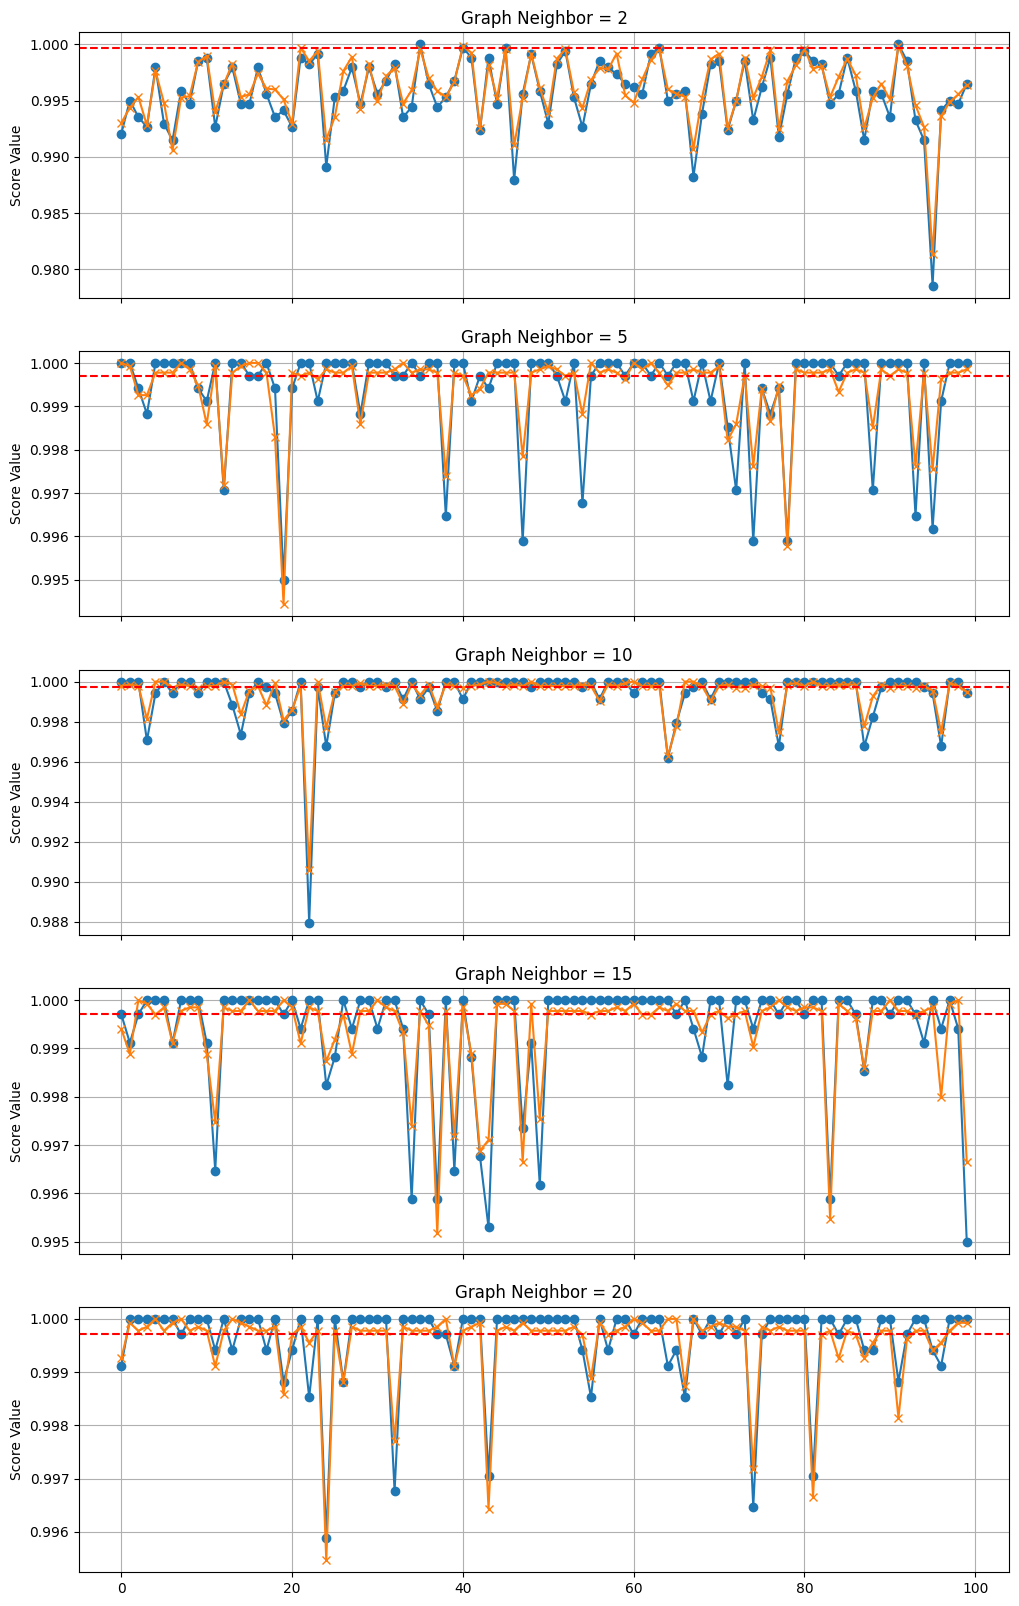

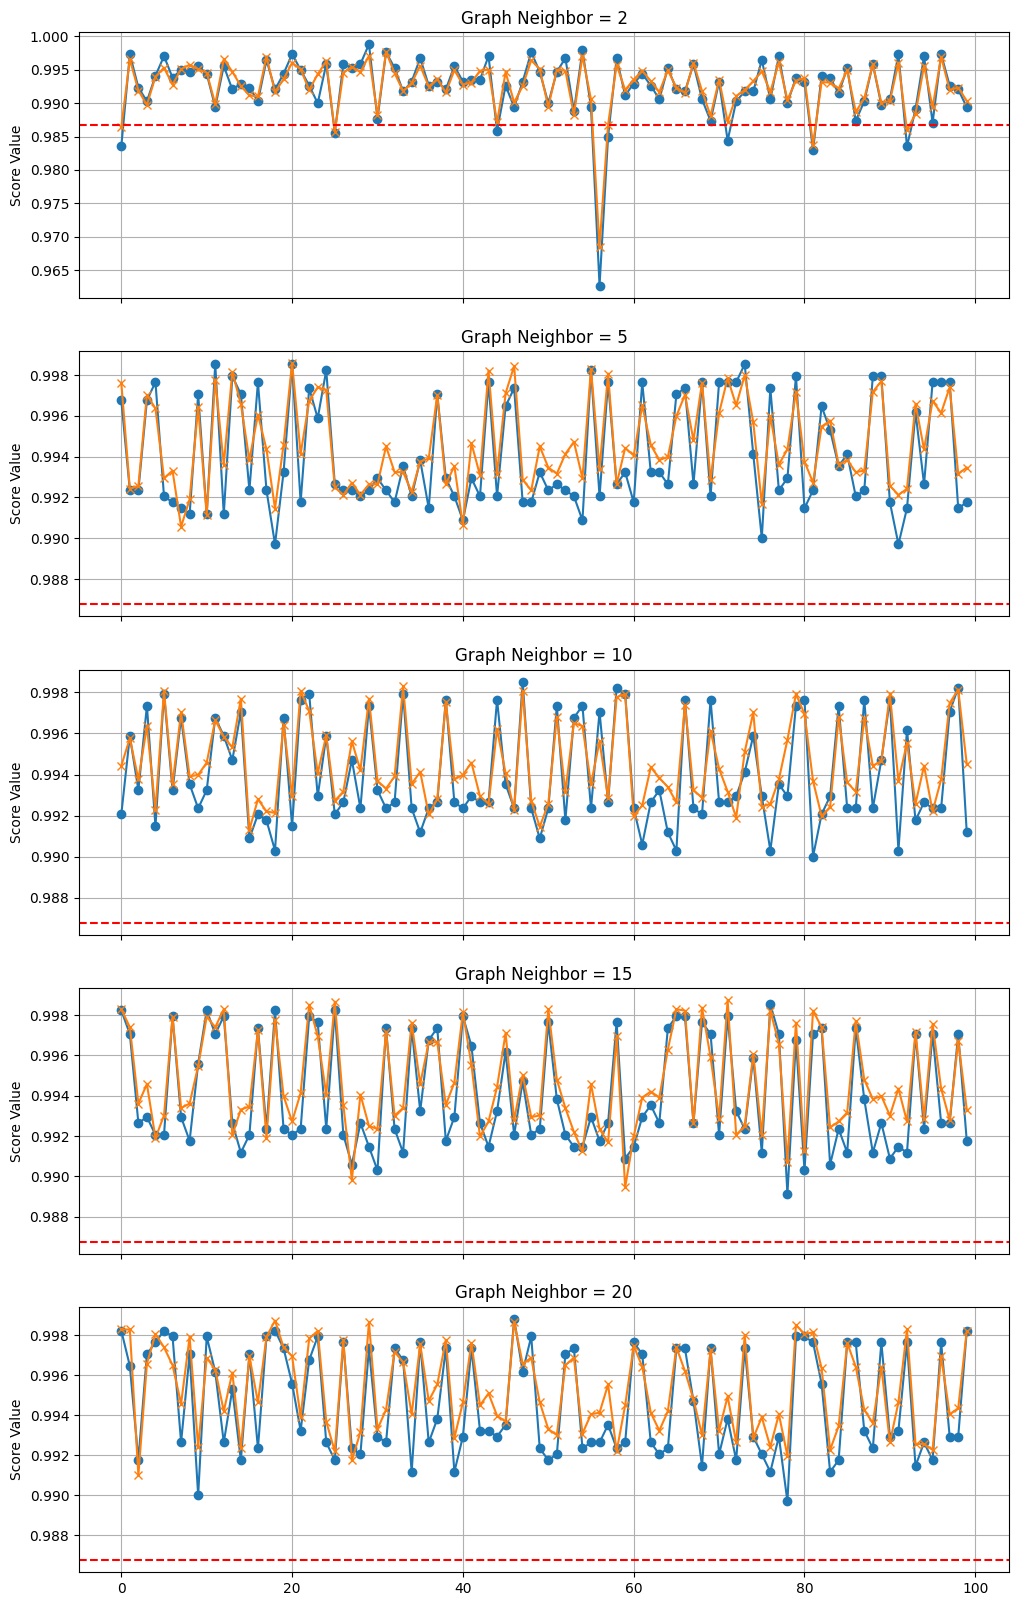

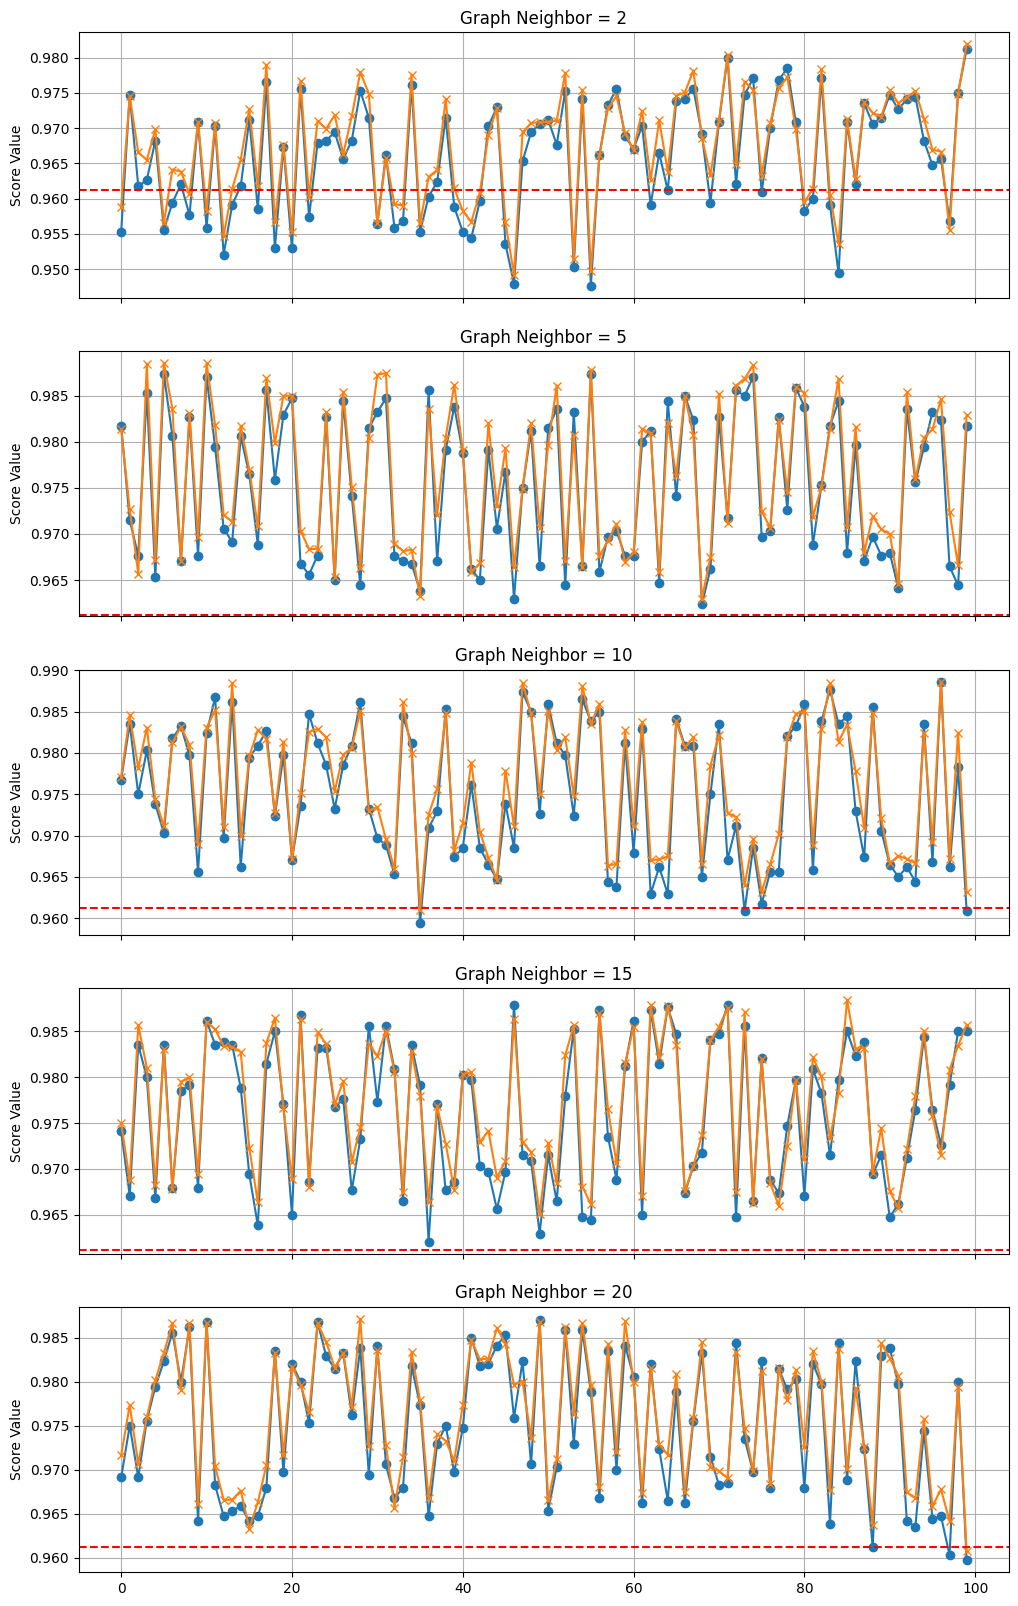

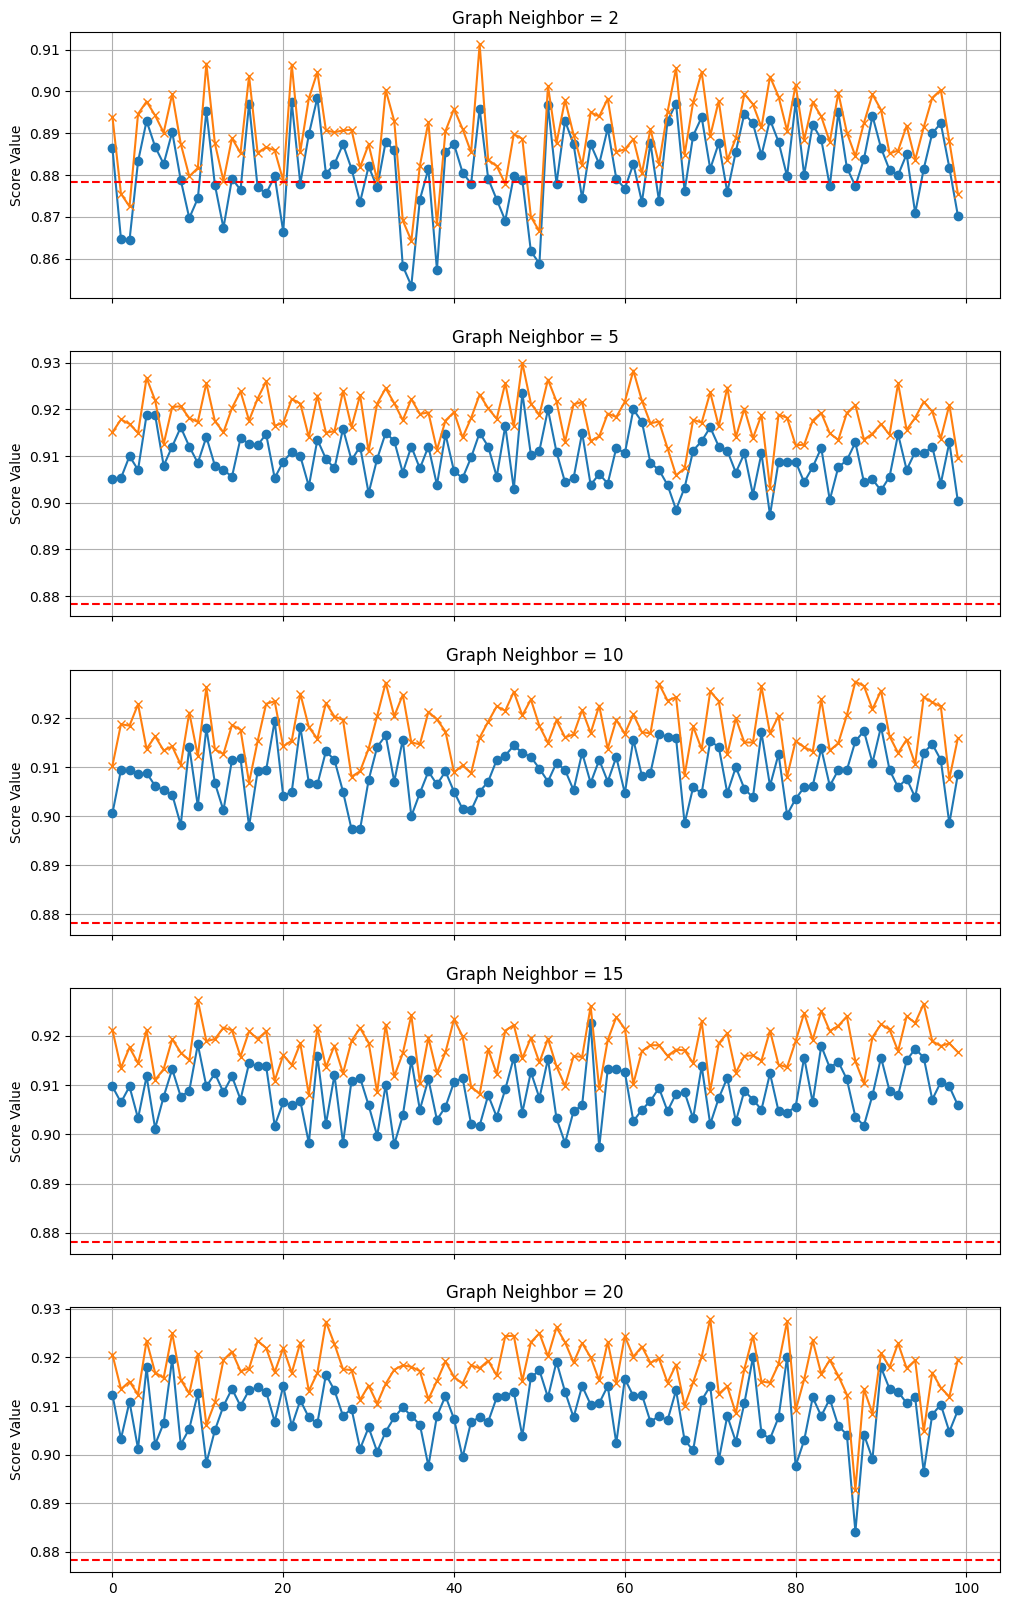

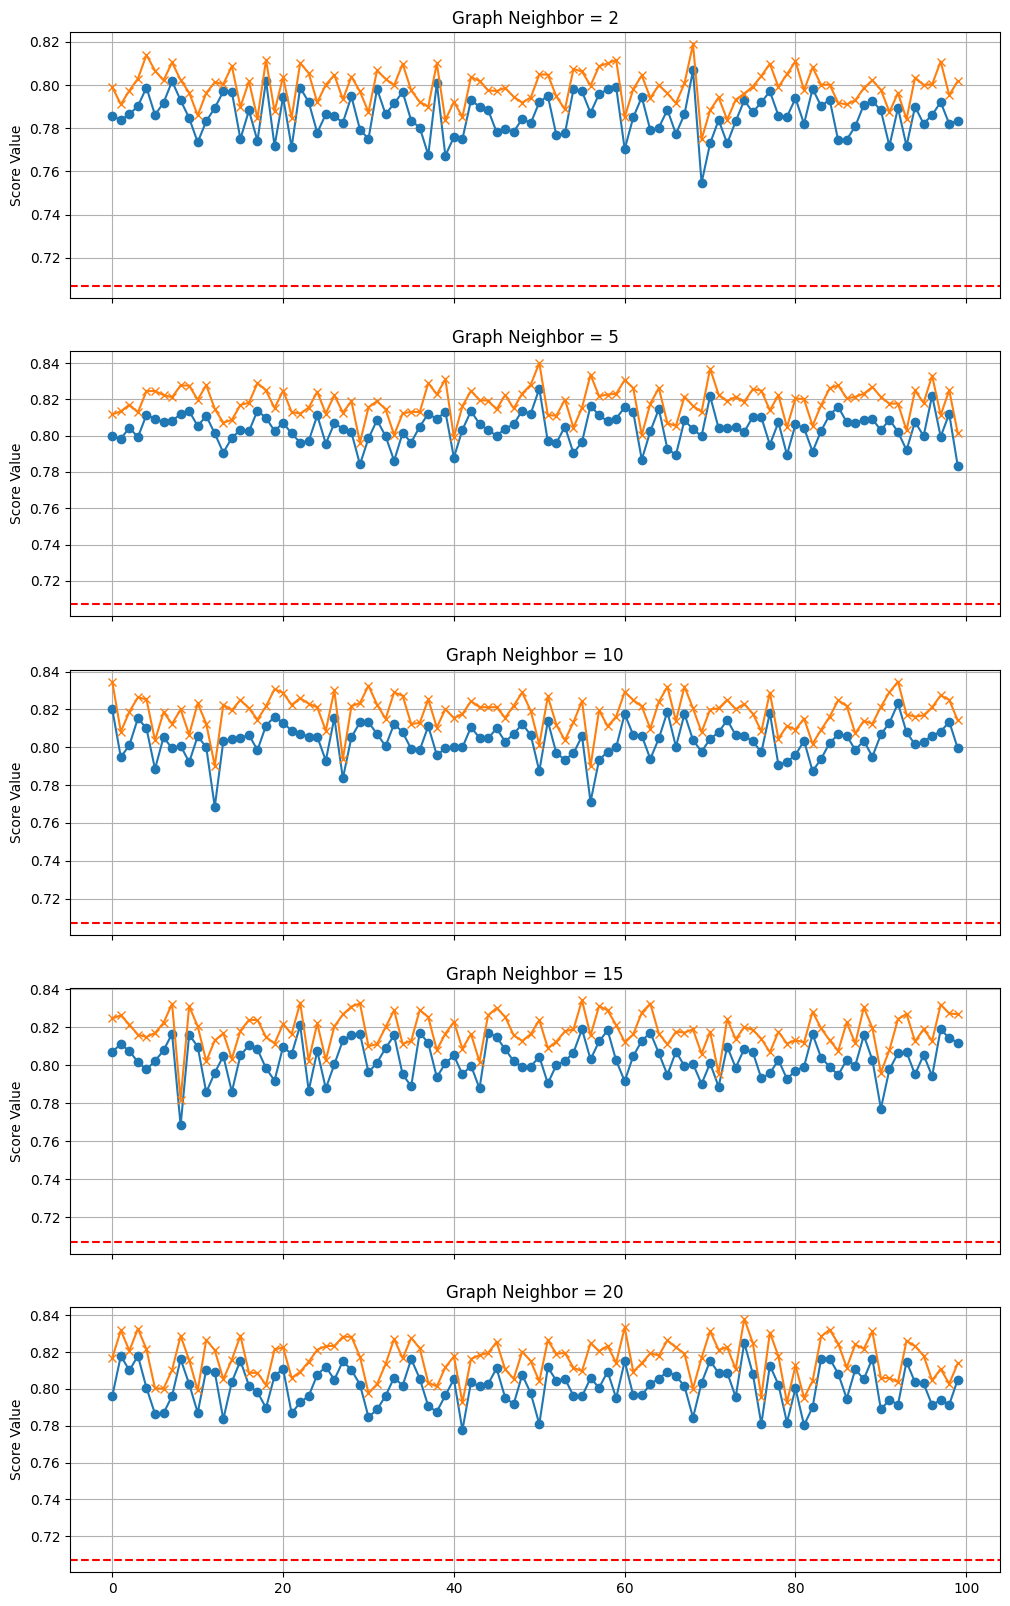

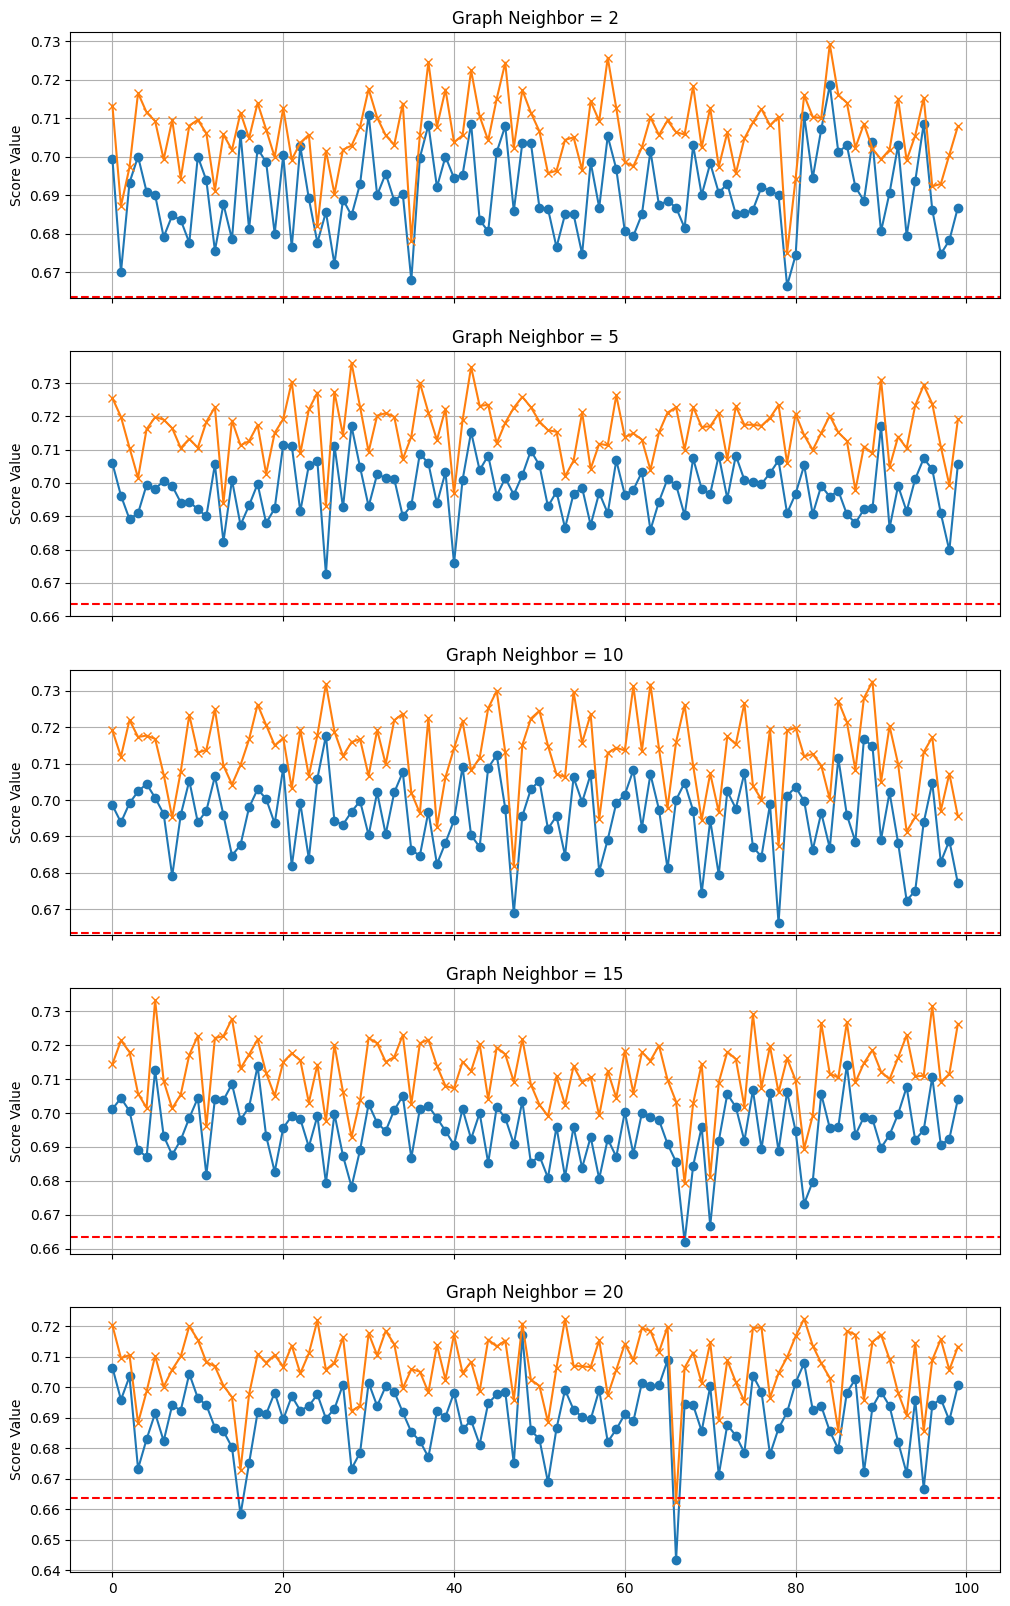

In [7]:
for std in std_values:

    fig, axes = plt.subplots(5, 1, figsize=(12, 20), sharex=True)
    print(f"std: {std}")
    for idx, graph_neighbors in  zip(range(len(graph_neighbors_value)), graph_neighbors_value):
        ax = axes[idx]
        print(f"graph_neighbors: {graph_neighbors}")
        score_test_be = data[f'std_{std}'][f'graph_neighbor_{graph_neighbors}']['score_base_estimator_test']
        score_test_it = data[f'std_{std}'][f'graph_neighbor_{graph_neighbors}']['score_list_test']
        score_unlabel_it = data[f'std_{std}'][f'graph_neighbor_{graph_neighbors}']['score_list_unlabel']
      
        # Chart the results
        
        ax.plot(score_test_it, label='Score Test', marker='o')
        ax.plot(score_unlabel_it, label='Score Unlabeled', marker='x')
        ax.axhline(y=score_test_be, color='r', linestyle='--', 
                   label=f'Score Test BE ({score_test_be:.2f})')
        
        ax.set_title(f'Graph Neighbor = {graph_neighbors}')
        ax.set_ylabel('Score Value')
        ax.grid()
        



        
   

In [8]:
data[f'std_{std}'].keys()  # Check the keys in the dictionary for std_1

dict_keys(['graph_neighbor_2', 'graph_neighbor_5', 'graph_neighbor_10', 'graph_neighbor_15', 'graph_neighbor_20'])

In [9]:
data['std_1']['graph_neighbor_2'].keys()

dict_keys(['graph_neighbors', 'score_base_estimator_val', 'score_base_estimator_unlabel', 'score_base_estimator_test', 'setred_score_mean_test', 'setred_score_std_test', 'setred_score_mean_unlabel', 'setred_score_std_unlabel', 'score_list_test', 'score_list_unlabel'])

In [10]:
score_test_be = data['std_1']['graph_neighbor_2']['score_base_estimator_test']
score_test_it = data['std_1']['graph_neighbor_2']['score_list_test']
score_unlabel_it = data['std_1']['graph_neighbor_2']['score_list_unlabel']

In [11]:
data['std_1']['graph_neighbor_2'].keys()

dict_keys(['graph_neighbors', 'score_base_estimator_val', 'score_base_estimator_unlabel', 'score_base_estimator_test', 'setred_score_mean_test', 'setred_score_std_test', 'setred_score_mean_unlabel', 'setred_score_std_unlabel', 'score_list_test', 'score_list_unlabel'])

In [12]:
# Compare accuracy of base estimator and iterative method
accuracy_be = data['std_4']['graph_neighbor_2']['score_base_estimator_unlabel']
accuracy_setred = data['std_4']['graph_neighbor_2']['setred_score_mean_unlabel']
# Difference between the accuracy 
accuracy_diff = accuracy_setred - accuracy_be
percentage_diff = (accuracy_diff / accuracy_be) * 100
print(f"Accuracy of Base Estimator on unlabel set: {accuracy_be}")
print(f"Accuracy of SetRed: {accuracy_setred}")
print(f"Difference in Accuracy: {accuracy_diff}")
print(f"Percentage Difference: {percentage_diff:.2f}%")


Accuracy of Base Estimator on unlabel set: 0.7249702911467617
Accuracy of SetRed: 0.7986920677361852
Difference in Accuracy: 0.07372177658942347
Percentage Difference: 10.17%


# REPORT BASED ON THE TEST 

In [13]:
# Prepare container
result_dict = {}

for neighbor_value in graph_neighbors_value:
    row_dict = {}
    for std_value in std_values:
        std_key = f'std_{std_value}'
        neighbor_key = f'graph_neighbor_{neighbor_value}'
        
        be = data[std_key][neighbor_key]['score_base_estimator_test']
        setred = data[std_key][neighbor_key]['setred_score_mean_test']
        diff = setred - be
        percentage_diff = (diff / be) * 100

        # For example, store just the SETRED mean accuracy
        row_dict[(f'std_{std_value}', 'BE')] = be
        row_dict[(f'std_{std_value}', 'SetRed')] = setred
        row_dict[(f'std_{std_value}', 'Diff')] = diff
        row_dict[(f'std_{std_value}', 'Diff %')] = percentage_diff

    result_dict[f'neighbor_{neighbor_value}'] = row_dict

# Create DataFrame
df = pd.DataFrame.from_dict(result_dict, orient='index')

# Create MultiIndex
df.columns = pd.MultiIndex.from_tuples(df.columns)

# Sort to keep stds ordered
df = df.sort_index(axis=1, level=[0, 1])

# Optional: round
df = df.round(3)

df



std_1                      std_1.5                       std_2  \
               BE   Diff Diff % SetRed      BE   Diff Diff % SetRed     BE   
neighbor_2    1.0 -0.004 -0.405  0.996   0.987  0.006  0.570  0.992  0.961   
neighbor_5    1.0 -0.000 -0.030  0.999   0.987  0.007  0.741  0.994  0.961   
neighbor_10   1.0 -0.000 -0.030  0.999   0.987  0.007  0.731  0.994  0.961   
neighbor_15   1.0 -0.000 -0.030  0.999   0.987  0.007  0.739  0.994  0.961   
neighbor_20   1.0 -0.000 -0.008  1.000   0.987  0.008  0.798  0.995  0.961   

                    ...  std_3         std_4                        std_5  \
              Diff  ... Diff % SetRed     BE   Diff  Diff % SetRed     BE   
neighbor_2   0.005  ...  0.412  0.882  0.707  0.079  11.152  0.786  0.664   
neighbor_5   0.014  ...  3.552  0.909  0.707  0.097  13.725  0.804  0.664   
neighbor_10  0.014  ...  3.454  0.909  0.707  0.096  13.628  0.803  0.664   
neighbor_15  0.015  ...  3.422  0.908  0.707  0.096  13.548  0.803  0.664   
neighbor_20  0.014  ...  3.434  0.908  0.707  0.094  13.324  0.801  0.664   

                                  
              Diff Diff % SetRed  
neighbor_2   0.027  4.092  0.691  
neighbor_5   0.034  5.198  0.698  
neighbor_10  0.032  4.788  0.695  
neighbor_15  0.031  4.695  0.695  
neighbor_20  0.027  4.003  0.690  

[5 rows x 24 columns]

In [14]:
std = [f'std_{n}' for n in std_values]
metrics = ['BE', 'SetRed', 'Diff', 'Diff %']
ordered_columns = pd.MultiIndex.from_product([std, metrics])
df = df.reindex(columns=ordered_columns)
df.to_excel('simulation_results/summary_results.xlsx', index=True)

In [15]:
df_long = df.stack().stack().reset_index()
df_long.columns = ['neighbor', 'metric', 'std', 'value']

/var/folders/b9/3rhyw3yn6xj6wh63pjfz16100000gn/T/ipykernel_2014/801285882.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_long = df.stack().stack().reset_index()


In [16]:
df_long

,neighbor,metric,std,value
0,neighbor_2,BE,std_1,1.000
1,neighbor_2,BE,std_1.5,0.987
2,neighbor_2,BE,std_2,0.961
3,neighbor_2,BE,std_3,0.878
4,neighbor_2,BE,std_4,0.707
...,...,...,...,...
115,neighbor_20,SetRed,std_1.5,0.995
116,neighbor_20,SetRed,std_2,0.975
117,neighbor_20,SetRed,std_3,0.908
118,neighbor_20,SetRed,std_4,0.801


In [17]:
df_wide = df_long.pivot_table(
    index=['std', 'neighbor'],
    columns='metric',
    values='value').reset_index()
df_wide.to_csv('simulation_results/chart_results.csv', index=False)



# REPORT BASED ON THE UNLABELED DATA
 

In [19]:
# Prepare container
result_dict = {}

for neighbor_value in graph_neighbors_value:
    row_dict = {}
    for std_value in std_values:
        std_key = f'std_{std_value}'
        neighbor_key = f'graph_neighbor_{neighbor_value}'
        
        be = data[std_key][neighbor_key]['score_base_estimator_unlabel']
        setred = data[std_key][neighbor_key]['setred_score_mean_unlabel']
        diff = setred - be
        percentage_diff = (diff / be) * 100

        # For example, store just the SETRED mean accuracy
        row_dict[(f'std_{std_value}', 'BE')] = be
        row_dict[(f'std_{std_value}', 'SetRed')] = setred
        row_dict[(f'std_{std_value}', 'Diff')] = diff
        row_dict[(f'std_{std_value}', 'Diff %')] = percentage_diff

    result_dict[f'neighbor_{neighbor_value}'] = row_dict

# Create DataFrame
df_unalbel = pd.DataFrame.from_dict(result_dict, orient='index')

# Create MultiIndex
df_unalbel.columns = pd.MultiIndex.from_tuples(df_unalbel.columns)

# Sort to keep stds ordered
df_unalbel = df_unalbel.sort_index(axis=1, level=[0, 1])

# Optional: round
df_unalbel = df_unalbel.round(3)

df_unalbel


std_1                      std_1.5                       std_2  \
                BE   Diff Diff % SetRed      BE   Diff Diff % SetRed     BE   
neighbor_2   0.999 -0.003 -0.328  0.996   0.987  0.006  0.586  0.993  0.964   
neighbor_5   0.999  0.000  0.004  0.999   0.987  0.008  0.794  0.995  0.964   
neighbor_10  0.999  0.000  0.005  0.999   0.987  0.008  0.790  0.995  0.964   
neighbor_15  0.999 -0.000 -0.002  0.999   0.987  0.008  0.800  0.995  0.964   
neighbor_20  0.999  0.000  0.016  1.000   0.987  0.009  0.864  0.995  0.964   

                    ...  std_3         std_4                        std_5  \
              Diff  ... Diff % SetRed     BE   Diff  Diff % SetRed     BE   
neighbor_2   0.003  ...  0.011  0.890  0.725  0.074  10.169  0.799  0.685   
neighbor_5   0.012  ...  3.215  0.918  0.725  0.093  12.896  0.818  0.685   
neighbor_10  0.012  ...  3.163  0.918  0.725  0.093  12.886  0.818  0.685   
neighbor_15  0.013  ...  3.126  0.918  0.725  0.093  12.794  0.818  0.685   
neighbor_20  0.012  ...  3.121  0.917  0.725  0.091  12.575  0.816  0.685   

                                  
              Diff Diff % SetRed  
neighbor_2   0.021  3.015  0.706  
neighbor_5   0.031  4.492  0.716  
neighbor_10  0.028  4.058  0.713  
neighbor_15  0.027  3.917  0.712  
neighbor_20  0.022  3.177  0.707  

[5 rows x 24 columns]

In [20]:
std = [f'std_{n}' for n in std_values]
metrics = ['BE', 'SetRed', 'Diff', 'Diff %']
ordered_columns = pd.MultiIndex.from_product([std, metrics])
df_unalbel = df_unalbel.reindex(columns=ordered_columns)
df_unalbel.to_excel('simulation_results/summary_results_unlabel.xlsx', index=True)